### Libraries

In [1]:
import gensim

from sklearn.ensemble import RandomForestClassifier

import fun_encoding as fe
import fun_metrics as fm
import fun_features_engineering 

In [2]:
URL_PREFIXE : str = 'https://raw.githubusercontent.com/Franck-Dernoncourt/pubmed-rct/master/PubMed_20k_RCT/'
URL_TRAIN : str = URL_PREFIXE + 'train.txt'
URL_TEST : str = URL_PREFIXE + 'test.txt'

## Get dataframes

In [3]:
df_train = fe.create_df_clean(URL_TRAIN)
df_test = fe.create_df_clean(URL_TEST)

In [4]:
df_train.shape, df_test.shape

((180040, 2), (30135, 2))

## Analyze the interest of new features

test example to evaluate the importance of new features:

In [5]:
labels_str : list[str] = ['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS']

print("Nombre de mot moyen par phrase : \n")
nbr_de_mot_list : list[int] = fun_features_engineering.words_number(df_test)
for i, label in enumerate(labels_str):
    print(f"{label} = {nbr_de_mot_list[i]}")


print("\n\nRapport moyen du nbr de nom propre / nbr de mot : \n")
nnp_list : list[float] = fun_features_engineering.get_proportion_tag(df_test.iloc[:1000], 'NNP')
for i, label in enumerate(labels_str):
    print(f"{label} = {nnp_list[i]}")


print("\n\nProportion de phrase ayant le str '%' : \n")
pourcent_list : list[float] = fun_features_engineering.word_is_in_sentence(df_test, '%')
for i, label in enumerate(labels_str):
    print(f"{label} = {pourcent_list[i]}")

Nombre de mot moyen par phrase : 



BACKGROUND = 21
CONCLUSIONS = 22
METHODS = 25
OBJECTIVE = 26
RESULTS = 30


Rapport moyen du nbr de nom propre / nbr de mot : 

BACKGROUND = 0.09401312181894789
CONCLUSIONS = 0.05193714097250334
METHODS = 0.0731537194882112
OBJECTIVE = 0.0527667121979271
RESULTS = 0.07921468254811896


Proportion de phrase ayant le str '%' : 

BACKGROUND = 0.01463684065175366
CONCLUSIONS = 0.02056442791511704
METHODS = 0.04132565423865818
OBJECTIVE = 0.021431633090441493
RESULTS = 0.296818696592196


## Model 1.1

Création de notre modèle Word2Vec utilisant CBOW

In [9]:
model : gensim.models.word2vec.Word2Vec = fe.create_word_embeddings(df_train['sentence'].tolist(), epochs=3)
# model = Word2Vec.load('model_w2v_1.bin')
X_train, y_train, X_test, y_test = fun_features_engineering.get_final_data(df_train, df_test, model)

## Model 1.2

Creation of a CountVectorizer model to transform the text data into a matrix of token counts.

In [ ]:
X_train, y_train, X_test, y_test = fun_features_engineering.get_final_data_for_cbow_sklearn(df_train, df_test)

## Classifier

In [11]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

### Analyse des performances du classifier

Mean accuracy : 0.5875559980089596
              precision    recall  f1-score   support

           0       0.46      0.34      0.39      3621
           1       0.41      0.53      0.46      4571
           2       0.62      0.72      0.67      9897
           3       0.36      0.21      0.26      2333
           4       0.74      0.66      0.70      9713

    accuracy                           0.59     30135
   macro avg       0.52      0.49      0.50     30135
weighted avg       0.59      0.59      0.58     30135



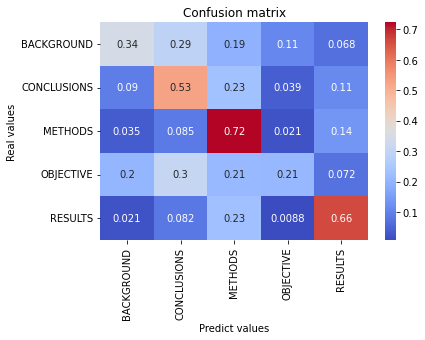

In [12]:
fm.display_metrics_and_confusion_matrix(clf, X_test, y_test)